
# Call Volume Forecasting_ARIMA and Seasonal ARIMA


In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df=pd.read_csv('Data/monthly-calls.csv')

In [46]:
df.head()

,Month,Call_volume
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [47]:
df.tail()

,Month,Call_volume
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,year,NaN


In [48]:
## Cleaning up the data
df.columns=["Month","Calls"]
df.head()

,Month,Calls
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [49]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [50]:
df.tail()

,Month,Calls
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [51]:
df.drop(105,axis=0,inplace=True)

In [52]:
df.tail()

,Month,Calls
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [53]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [54]:
df.head()

,Month,Calls
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [55]:
df.set_index('Month',inplace=True)

In [56]:
df.head()

,Calls
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [57]:
df.describe()

,Calls
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

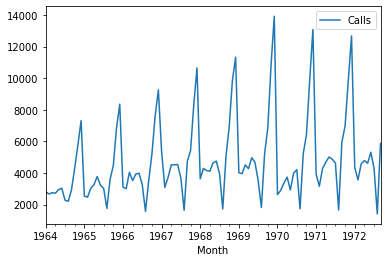

In [58]:
df.plot()

In [62]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [63]:
test_result=adfuller(df['Calls'])

In [68]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(calls):
    result=adfuller(calls)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [69]:
adfuller_test(df['Calls'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [70]:
df['Calls First Difference'] = df['Calls'] - df['Calls'].shift(1)

In [71]:
df['Calls'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Calls, Length: 105, dtype: float64

In [72]:
df['Seasonal First Difference']=df['Calls']-df['Calls'].shift(12)

In [73]:
df.head(14)

,Calls,Calls First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [74]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213162
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


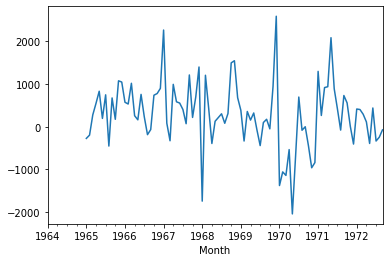

In [75]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
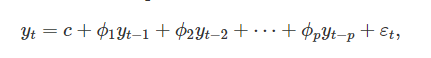

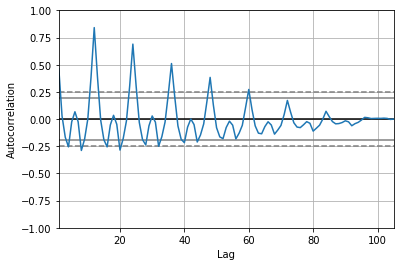

In [76]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Calls'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [77]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

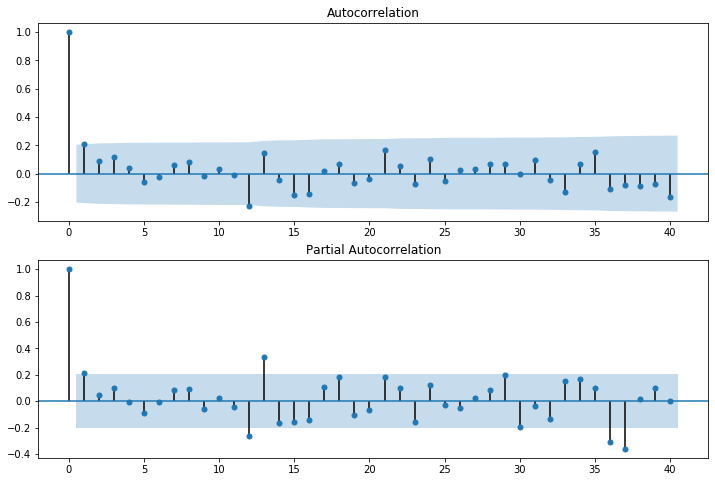

In [78]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [79]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [80]:
model=ARIMA(df['Calls'],order=(1,1,1),freq=df.index.inferred_freq)
model_fit=model.fit()

In [81]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Calls   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 10 May 2020   AIC                           1910.251
Time:                        21:48:05   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7838     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Calls     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Calls    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

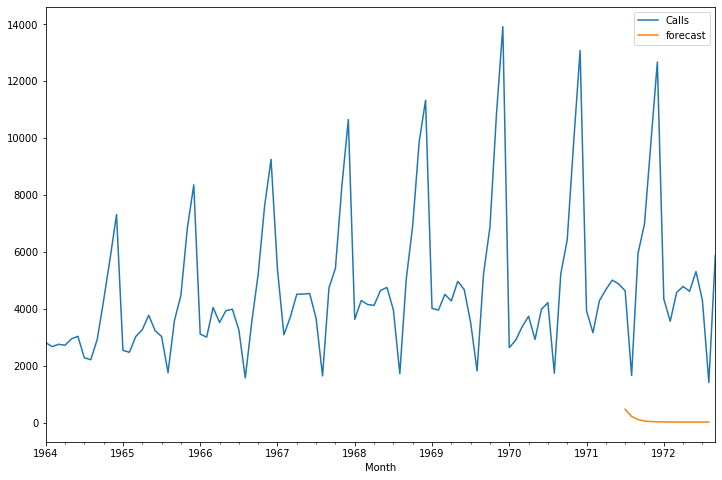

In [82]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Calls','forecast']].plot(figsize=(12,8))

In [83]:
model=sm.tsa.statespace.SARIMAX(df['Calls'],order=(1, 1, 1),freq=df.index.inferred_freq,seasonal_order=(1,1,1,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


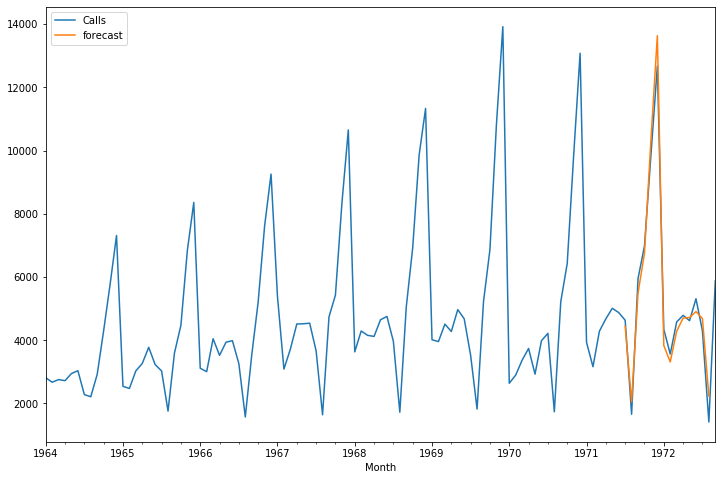

In [84]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Calls','forecast']].plot(figsize=(12,8))

In [85]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [86]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [87]:
future_datest_df.tail()

,Calls,Calls First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [88]:
future_df=pd.concat([df,future_datest_df])

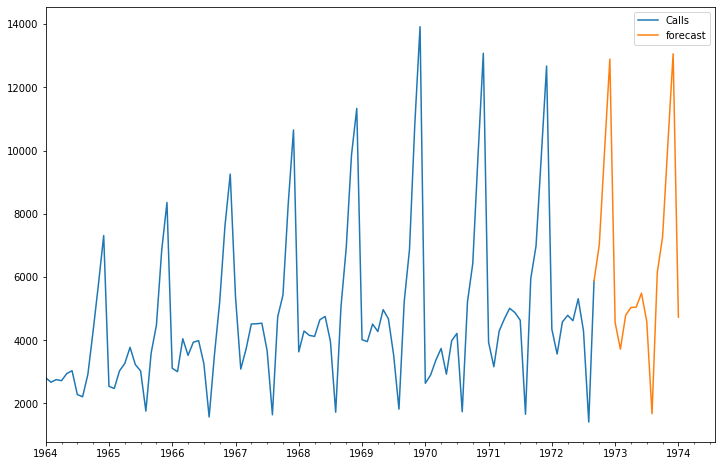

In [89]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Calls', 'forecast']].plot(figsize=(12, 8)) 